In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
'''        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n        \n"

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
!pip install opencv-python

In [5]:
image = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg',cv2.IMREAD_GRAYSCALE)

In [6]:
image.shape

(1858, 2090)

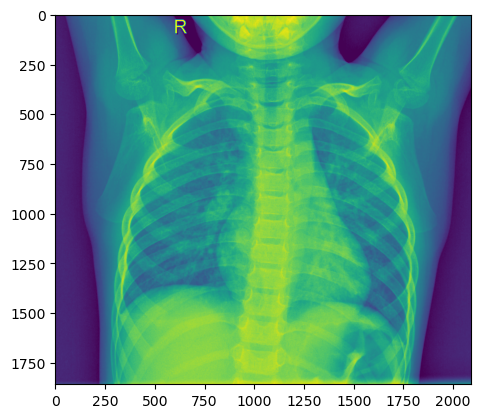

In [7]:
plt.imshow(image)

In [8]:
## import matplotlib.pyplot as plt
import glob
import librosa
import numpy as np
import cv2 
pneumonia = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*.jpeg')
normal = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/*.jpeg')

data = []
labels = []

image_size=(64,64)

for i in pneumonia:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(0)
    
    

for i in normal:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(1)
    


    
X=np.array(data)
y=np.array(labels)
y.shape

(5216,)

In [9]:
X.shape

(5216, 64, 64)

In [11]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
for drops in np.arange(0.15,0.55,0.05):
    # Build the MLP model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(64,64)),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dropout(drops),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # Define the learning rate reduction callback
    lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',   # Monitor validation loss for learning rate reduction
        factor=0.05,            # Reduce learning rate by a factor of 0.05
        patience=5,            # Number of epochs with no improvement after which learning rate will be reduced
        min_lr=1e-6            # Minimum learning rate
    )
    # Define the model checkpoint callback to save the best model
    checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

    # Define the early stopping callback to stop training if validation loss does not improve
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=6)


    # Train the model
    # Train the model
    model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=30, batch_size=32)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Dropout:{drops:.2f}")
    print(f"Test loss: {loss:.4f}")
    print(f"Test accuracy: {accuracy:.4f}")

    # Make predictions on new images
    predictions = model.predict(X_test[:10])
    predicted_classes = np.argmax(predictions, axis=1)

    # Print the predicted class and corresponding true class
    #for i in range(len(predicted_classes)):
        #print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")
        
    

Epoch 1/30
105/105 [==============================] - 2s 7ms/step - loss: 20.4053 - accuracy: 0.6973 - val_loss: 0.6779 - val_accuracy: 0.7353
Epoch 2/30
105/105 [==============================] - 0s 5ms/step - loss: 0.8893 - accuracy: 0.7516 - val_loss: 0.6591 - val_accuracy: 0.7353
Epoch 3/30
105/105 [==============================] - 1s 5ms/step - loss: 0.6478 - accuracy: 0.7516 - val_loss: 0.6432 - val_accuracy: 0.7353
Epoch 4/30
105/105 [==============================] - 1s 5ms/step - loss: 0.6318 - accuracy: 0.7516 - val_loss: 0.6297 - val_accuracy: 0.7353
Epoch 5/30
105/105 [==============================] - 0s 5ms/step - loss: 0.6182 - accuracy: 0.7516 - val_loss: 0.6184 - val_accuracy: 0.7353
Epoch 6/30
105/105 [==============================] - 1s 5ms/step - loss: 0.6067 - accuracy: 0.7516 - val_loss: 0.6093 - val_accuracy: 0.7353
Epoch 7/30
105/105 [==============================] - 0s 5ms/step - loss: 0.5972 - accuracy: 0.7516 - val_loss: 0.6017 - val_accuracy: 0.7353
Epoch

In [21]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,64)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the learning rate reduction callback
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss for learning rate reduction
    factor=0.05,            # Reduce learning rate by a factor of 0.05
    patience=6,            # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6            # Minimum learning rate
)
# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Define the early stopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=6)


# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=30, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Epoch 1/30
105/105 [==============================] - 2s 9ms/step - loss: 33.0587 - accuracy: 0.7321 - val_loss: 3.4161 - val_accuracy: 0.6982
Epoch 2/30
105/105 [==============================] - 1s 7ms/step - loss: 1.8590 - accuracy: 0.7624 - val_loss: 0.4777 - val_accuracy: 0.6527
Epoch 3/30
105/105 [==============================] - 1s 7ms/step - loss: 0.4903 - accuracy: 0.7519 - val_loss: 0.3869 - val_accuracy: 0.8778
Epoch 4/30
105/105 [==============================] - 1s 7ms/step - loss: 0.3994 - accuracy: 0.8487 - val_loss: 0.3598 - val_accuracy: 0.9042
Epoch 5/30
105/105 [==============================] - 1s 6ms/step - loss: 0.3624 - accuracy: 0.8843 - val_loss: 0.4054 - val_accuracy: 0.9257
Epoch 6/30
105/105 [==============================] - 1s 6ms/step - loss: 0.3303 - accuracy: 0.8906 - val_loss: 0.3323 - val_accuracy: 0.8874
Epoch 7/30
105/105 [==============================] - 1s 6ms/step - loss: 0.3577 - accuracy: 0.8852 - val_loss: 0.2943 - val_accuracy: 0.9353
Epoch

In [25]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,64)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the learning rate reduction callback
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss for learning rate reduction
    factor=0.05,            # Reduce learning rate by a factor of 0.05
    patience=6,            # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6            # Minimum learning rate
)
# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Define the early stopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=6)


# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=30, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Epoch 1/30
105/105 [==============================] - 2s 8ms/step - loss: 25.4642 - accuracy: 0.6961 - val_loss: 3.8396 - val_accuracy: 0.7880
Epoch 2/30
105/105 [==============================] - 1s 6ms/step - loss: 2.5754 - accuracy: 0.7878 - val_loss: 0.5121 - val_accuracy: 0.7545
Epoch 3/30
105/105 [==============================] - 1s 8ms/step - loss: 0.3531 - accuracy: 0.8631 - val_loss: 0.2858 - val_accuracy: 0.9006
Epoch 4/30
105/105 [==============================] - 1s 7ms/step - loss: 0.3260 - accuracy: 0.8804 - val_loss: 0.2877 - val_accuracy: 0.8647
Epoch 5/30
105/105 [==============================] - 1s 6ms/step - loss: 0.2874 - accuracy: 0.8738 - val_loss: 0.2796 - val_accuracy: 0.8323
Epoch 6/30
105/105 [==============================] - 1s 6ms/step - loss: 0.3371 - accuracy: 0.8622 - val_loss: 0.2768 - val_accuracy: 0.9006
Epoch 7/30
105/105 [==============================] - 1s 6ms/step - loss: 0.4002 - accuracy: 0.7453 - val_loss: 0.3311 - val_accuracy: 0.7353
Epoch

In [26]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,64)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the learning rate reduction callback
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss for learning rate reduction
    factor=0.05,            # Reduce learning rate by a factor of 0.05
    patience=6,            # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6            # Minimum learning rate
)
# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Define the early stopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=6)


# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=30, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Epoch 1/30
105/105 [==============================] - 2s 8ms/step - loss: 42.0545 - accuracy: 0.7603 - val_loss: 14.5575 - val_accuracy: 0.7760
Epoch 2/30
105/105 [==============================] - 1s 6ms/step - loss: 5.0576 - accuracy: 0.8127 - val_loss: 1.7588 - val_accuracy: 0.8743
Epoch 3/30
105/105 [==============================] - 1s 6ms/step - loss: 1.5402 - accuracy: 0.8040 - val_loss: 0.4663 - val_accuracy: 0.7353
Epoch 4/30
105/105 [==============================] - 1s 7ms/step - loss: 0.4204 - accuracy: 0.7408 - val_loss: 0.4942 - val_accuracy: 0.7353
Epoch 5/30
105/105 [==============================] - 1s 7ms/step - loss: 0.4424 - accuracy: 0.7591 - val_loss: 0.3480 - val_accuracy: 0.7353
Epoch 6/30
105/105 [==============================] - 1s 6ms/step - loss: 0.3310 - accuracy: 0.8031 - val_loss: 0.3560 - val_accuracy: 0.9114
Epoch 7/30
105/105 [==============================] - 1s 6ms/step - loss: 0.3026 - accuracy: 0.8744 - val_loss: 0.2980 - val_accuracy: 0.9138
Epoc

In [28]:
pneumonia = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/*.jpeg')
normal = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/*.jpeg')

data = []
labels = []

image_size=(64,64)

for i in pneumonia:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(0)
    
    

for i in normal:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(1)
    


    
X_TEST=np.array(data)
y_TEST=np.array(labels)
y_TEST.shape

(624,)

In [29]:
X_TEST.shape

(624, 64, 64)

In [33]:
loss, accuracy = model.evaluate(X_TEST, y_TEST)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_TEST[:50])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_TEST[i])}")

20/20 [==============================] - 0s 3ms/step - loss: 1.3480 - accuracy: 0.7356
Test loss: 1.3480
Test accuracy: 0.7356
2/2 [==============================] - 0s 4ms/step
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predic